In [2]:
from matplotlib import pyplot as plt

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("us.csv")

In [7]:
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [8]:
df.tail()

,date,cases,deaths
246,2020-09-23,6959494,201822
247,2020-09-24,7004672,202707
248,2020-09-25,7059208,203571
249,2020-09-26,7101969,204330
250,2020-09-27,7139301,204597


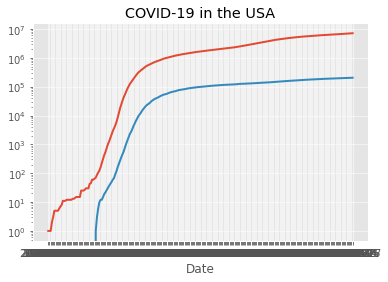

In [27]:
%matplotlib inline
plt.style.use('ggplot')
plt.semilogy(df.date, df.cases, label = 'Positive Cases');
plt.semilogy(df.date, df.deaths, label = 'Deaths');
#plt.legend(loc = 'lower right');
plt.xlabel('Date');
plt.title('COVID-19 in the USA');

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [28]:
pd.to_datetime(df.date)

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
246   2020-09-23
247   2020-09-24
248   2020-09-25
249   2020-09-26
250   2020-09-27
Name: date, Length: 251, dtype: datetime64[ns]

In [30]:
df.date = pd.to_datetime(df.date)
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


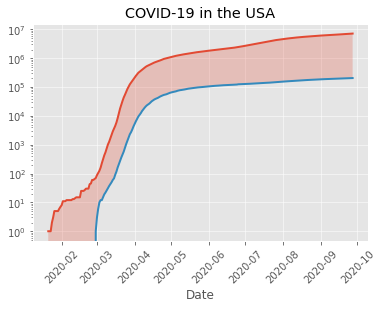

In [39]:
%matplotlib inline
plt.semilogy(df.date, df.cases, label = 'Positive Cases');
plt.semilogy(df.date, df.deaths, label = 'Deaths');
plt.fill_between(df.date, df.deaths, df.cases, alpha = 0.25);
plt.xticks(rotation= 45)
#plt.legend(loc = 'lower right');
plt.xlabel('Date');
plt.title('COVID-19 in the USA');
#plt.savefig('a.png');

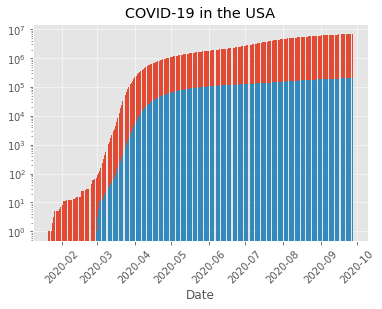

In [41]:
%matplotlib inline
plt.bar(df.date, df.cases, label = 'Positive Cases');
plt.bar(df.date, df.deaths, label = 'Deaths');
plt.xticks(rotation= 45);
plt.yscale('log')
#plt.legend(loc = 'lower right');
plt.xlabel('Date');
plt.title('COVID-19 in the USA');

In [44]:
df.set_index('date', inplace = True)
df.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


In [48]:
df.resample('M').mean()

,cases,deaths
date,,
2020-01-31,3.727273e+00,0.000000
2020-02-29,2.537931e+01,0.034483
2020-03-31,3.533977e+04,655.548387
2020-04-30,6.537234e+05,33016.500000
2020-05-31,1.466185e+06,86943.580645
2020-06-30,2.176239e+06,116630.800000
2020-07-31,3.600714e+06,138961.129032
2020-08-31,5.379233e+06,169671.064516
2020-09-30,6.596011e+06,194888.296296


In [50]:
mdf = df.resample('MS').mean()

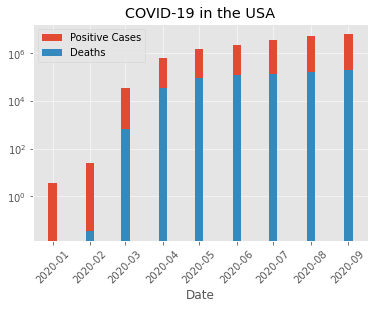

In [56]:
%matplotlib inline
w=7
plt.bar(mdf.index, mdf.cases, label = 'Positive Cases', width = w);
plt.bar(mdf.index, mdf.deaths, label = 'Deaths', width = w);
plt.xticks(rotation= 45);
plt.yscale('log')
plt.legend();
plt.xlabel('Date');
plt.title('COVID-19 in the USA');

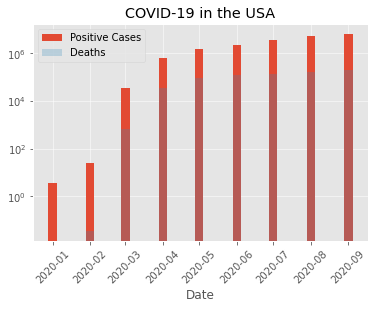

In [57]:
w=7
plt.bar(mdf.index, mdf.cases, label = 'Positive Cases', width = w);
plt.bar(mdf.index, mdf.deaths, label = 'Deaths', width = w, alpha = 0.25);
plt.xticks(rotation= 45);
plt.yscale('log')
plt.legend();
plt.xlabel('Date');
plt.title('COVID-19 in the USA');

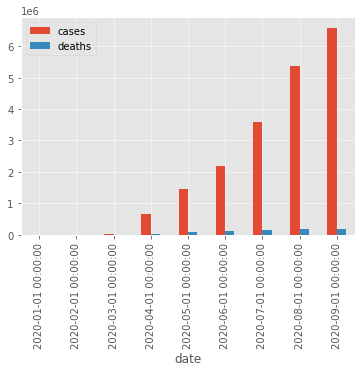

In [59]:
mdf.plot(kind = 'bar');

In [63]:
from datetime import datetime, timedelta
datetime.today() + timedelta(hours = 1)

datetime.datetime(2020, 9, 28, 17, 47, 5, 210493)

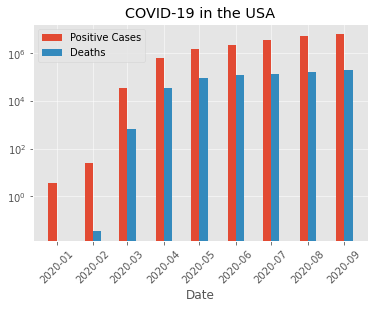

In [68]:
%matplotlib inline
w=7
plt.bar(mdf.index - timedelta(days = w/2), mdf.cases, label = 'Positive Cases', width = w);
plt.bar(mdf.index + timedelta(days = w/2), mdf.deaths, label = 'Deaths', width = w);
plt.xticks(rotation= 45);
plt.yscale('log')
plt.legend();
plt.xlabel('Date');
plt.title('COVID-19 in the USA');

In [70]:
# State Wise USA COVID-19 Data
states = pd.read_csv('us-states.csv')
states.tail(10)

,date,state,fips,cases,deaths
11499,2020-09-27,Tennessee,47,190037,2350
11500,2020-09-27,Texas,48,770539,15831
11501,2020-09-27,Utah,49,70615,453
11502,2020-09-27,Vermont,50,1742,58
11503,2020-09-27,Virgin Islands,78,1317,19
11504,2020-09-27,Virginia,51,146144,3159
11505,2020-09-27,Washington,53,89822,2196
11506,2020-09-27,West Virginia,54,15348,334
11507,2020-09-27,Wisconsin,55,122498,1291
11508,2020-09-27,Wyoming,56,5633,50


In [73]:
sep = states.loc[states.date >= '2020-09']
st = sep.groupby('state').mean()

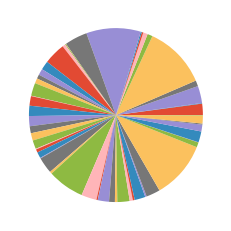

In [74]:
plt.pie(st.cases); # Not recommended

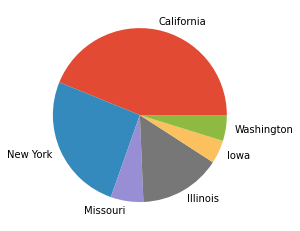

In [79]:
sts = ['California', 'New York', 'Missouri', 'Illinois', 'Iowa', 'Washington'];
plt.pie(st.loc[sts].cases, labels = sts);

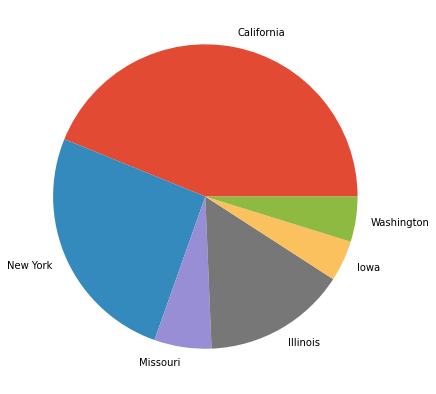

In [78]:
sts = ['California', 'New York', 'Missouri', 'Illinois', 'Iowa', 'Washington'];
plt.figure(figsize = (7,7));
plt.pie(st.loc[sts].cases, labels = sts);

In [80]:
st

,fips,cases,deaths
state,,,
Alabama,1.0,139483.703704,2365.222222
Alaska,2.0,7201.740741,41.074074
Arizona,4.0,209865.148148,5352.333333
Arkansas,5.0,71287.814815,1055.592593
California,6.0,766813.259259,14480.777778
Colorado,8.0,62874.148148,2003.703704
Connecticut,9.0,54788.814815,4483.333333
Delaware,10.0,18911.185185,617.296296
District of Columbia,11.0,14644.851852,616.259259


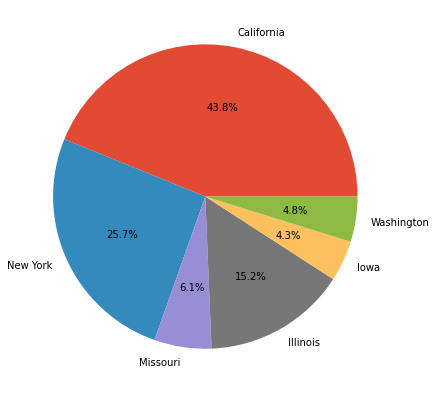

In [81]:
sts = ['California', 'New York', 'Missouri', 'Illinois', 'Iowa', 'Washington'];
plt.figure(figsize = (7,7));
plt.pie(st.loc[sts].cases, labels = sts, autopct = '%1.1f%%');

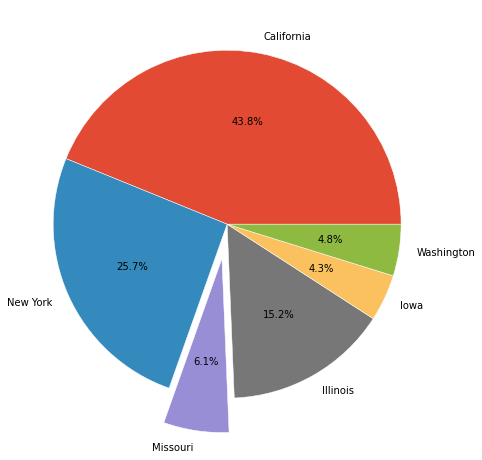

In [88]:
sts = ['California', 'New York', 'Missouri', 'Illinois', 'Iowa', 'Washington'];
e = [0 , 0, 0.2, 0, 0, 0]
plt.figure(figsize = (8,8));
plt.pie(st.loc[sts].cases, labels = sts, autopct = '%1.1f%%', explode = e, wedgeprops = {'edgecolor':'white'});

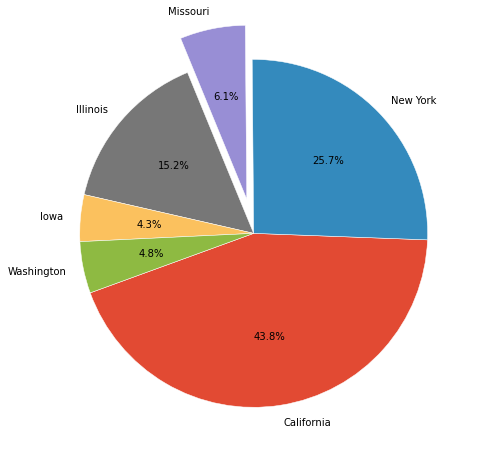

In [89]:
sts = ['California', 'New York', 'Missouri', 'Illinois', 'Iowa', 'Washington'];
e = [0 , 0, 0.2, 0, 0, 0]
plt.figure(figsize = (8,8));
plt.pie(st.loc[sts].cases, labels = sts, autopct = '%1.1f%%', explode = e, startangle = 200, wedgeprops = {'edgecolor':'white'});

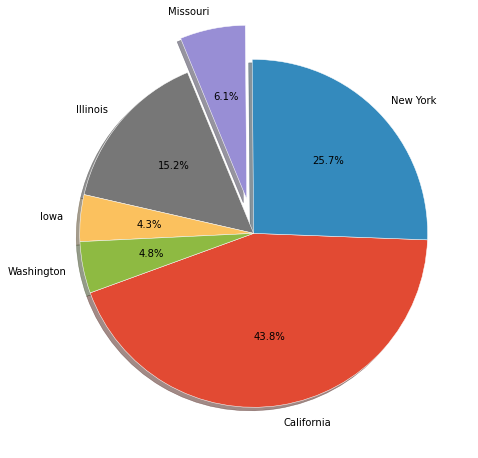

In [90]:
sts = ['California', 'New York', 'Missouri', 'Illinois', 'Iowa', 'Washington'];
e = [0 , 0, 0.2, 0, 0, 0]
plt.figure(figsize = (8,8));
plt.pie(st.loc[sts].cases, labels = sts, autopct = '%1.1f%%', explode = e, startangle = 200, shadow = True, wedgeprops = {'edgecolor':'white'});